In [61]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import plot_confusion_matrix, classification_report
DATASET = "amazon_reviews_us_Grocery_v1_00.tsv"


### Supervised Learning 


#### Key Takeaways

- Exploiting labelling mechanism 

- Using words as features 

- Evaludating ML models 


In [18]:

from os import walk
from functools import reduce


def read_dataset():
    _, _, filenames = next(walk("labelled_dataset"))
    dfs = []
    for f in filenames:
        df = pd.read_csv(f"labelled_dataset/{f}")
        dfs.append(df)
        
    return pd.concat(dfs)

In [103]:
labelled_df = read_dataset()
original_df = pd.read_table(DATASET, error_bad_lines=False, header=0, warn_bad_lines=False) 


/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Key Assumption

Any entries taken outside of the labelled dataset are assumped to be positive/negative reviews. This follows from the idea that filtering mechanism was 



In [128]:
def get_entries_outside_labelled_dataset(labelled_df,n):
    random_samples = original_df.sample(n)
    random_samples["food_safety_flag"] = "0" 
    return pd.concat([random_samples, labelled_df]).drop_duplicates().reset_index(drop=True)

def build_dataset(df, review_feature, meta_features, label_feature):
    df = get_entries_outside_labelled_dataset(df, 100)
    df.reset_index(inplace=True, drop=True)
    v = TfidfVectorizer()
    x = v.fit_transform(df[review_feature])
    tfidf_dataset = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
    meta_feature_dataset = df[meta_features]
    return pd.concat([meta_feature_dataset, tfidf_dataset],axis=1), [0 if "0" in str(label) else 1 for label in df[label_feature]]



    

In [129]:

X, y = build_dataset(labelled_df.copy(), "review_body", ["star_rating"], "food_safety_flag" )


In [108]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [131]:
from sklearn.naive_bayes import MultinomialNB

sgd = SGDClassifier(
    max_iter            = 1000, 
    tol                 = 1e-3,
    validation_fraction = 0.2
)

In [132]:
def evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred)
    print('\n Accuracy: ', accuracy_score(y_test, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', report)

    plot_confusion_matrix(clf, X_test, y_test)  


 Accuracy:  0.9473684210526315

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.88      0.88      0.88         8

    accuracy                           0.95        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.95      0.95      0.95        38



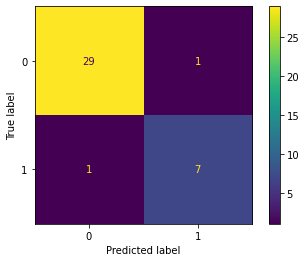

In [133]:
evaluate(sgd, X_train, X_test, y_train, y_test)

### Potential Next Steps 

- Evaluate which models output the best results 
- Investigate what features are most important to the model 

In [117]:
X.shape[0]

10089

In [122]:
y_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [134]:
X["food_safet_flag"]  "0"

,star_rating,00,05,09,10,100,1000mg,14,15,18,...,yogurt,you,young,your,yourself,yucky,yum,yummy,zero,zip
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.081718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
